Q1)Explain the concept of batch normalization in the context of Artificial Neural Networks?

Batch Normalization (BN) is a technique used in the training of artificial neural networks to improve the convergence speed and stability. It was introduced by Sergey Ioffe and Christian Szegedy in their 2015 paper titled "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift."

The main idea behind Batch Normalization is to normalize the input of each layer in a neural network by adjusting and scaling the activations. This is done within mini-batches during training. The normalization process helps address the issue of internal covariate shift, which is the change in the distribution of network activations due to the changing parameters during training. By stabilizing and normalizing the inputs to each layer, BN has several benefits:

1. **Improved Training Speed:**
   - Normalizing the inputs helps maintain a stable distribution of values throughout the training process, which accelerates convergence. Networks tend to converge faster, and as a result, fewer training epochs are needed.

2. **Enhanced Generalization:**
   - Batch Normalization acts as a form of regularization by adding a small amount of noise to the activations. This can reduce the reliance on dropout or other regularization techniques, improving the model's generalization to unseen data.

3. **Increased Learning Rates:**
   - Batch Normalization allows for the use of higher learning rates during training without the risk of divergence. This can further speed up the convergence process and potentially lead to better solutions.

The Batch Normalization process involves the following steps for each mini-batch during training:

1. **Calculate Batch Mean and Variance:**
   - Compute the mean and variance of the activations in the mini-batch.

2. **Normalize Activations:**
   - Subtract the mean and divide by the standard deviation to normalize the activations.

3. **Scale and Shift:**
   - Introduce learnable parameters (gamma and beta) to scale and shift the normalized activations. These parameters are adjusted during the training process through backpropagation.

4. **Update Running Statistics:**
   - Maintain running averages of the mean and variance over the entire training dataset to use during inference.

The batch normalization layer is typically inserted before the activation function in a neural network layer. This helps ensure that the inputs to the activation function remain centered and within a stable range.

In summary, Batch Normalization is a valuable technique in neural network training that normalizes and stabilizes the activations, leading to faster convergence, improved generalization, and the ability to use higher learning rates.

 Q2)Describe the benefits of using batch normalization during training?


Improved Convergence:

One of the primary advantages of Batch Normalization is its ability to accelerate the convergence of neural networks. By normalizing the input to each layer, BN helps to maintain a stable distribution of values throughout the training process. This stability allows for faster convergence, meaning that the network reaches a solution or optimal weights more quickly.

Stability Across Batches:

BN reduces the impact of internal covariate shift by normalizing the inputs within mini-batches. This means that the distribution of activations remains more consistent across different batches during training. This stability can help the model generalize better to unseen data.

Higher Learning Rates:

Batch Normalization enables the use of higher learning rates during training without the risk of divergence. The stable normalization provided by BN allows for faster weight updates, which can speed up the learning process. Faster learning is particularly beneficial when training deep neural networks.

Reduced Sensitivity to Weight Initialization:

BN reduces the dependence on careful weight initialization. Neural networks are often sensitive to the initial values of their weights, but BN mitigates this issue by normalizing the inputs, making the training process less sensitive to the choice of initial weights.

Regularization Effect:

Batch Normalization introduces a slight noise during training by adding the learnable parameters (gamma and beta) to the normalized activations. This acts as a form of regularization, reducing the reliance on other regularization techniques, such as dropout. The regularization effect can help prevent overfitting.

Easier Hyperparameter Tuning:

BN reduces the sensitivity of neural networks to hyperparameter choices. For example, it can make the choice of learning rates less critical, allowing practitioners to experiment with a broader range of hyperparameters without as much risk of divergent behavior.

Q3)Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters.

The working principle of Batch Normalization (BN) involves normalizing the inputs of each layer within a neural network during training. The process includes normalization steps and the introduction of learnable parameters to scale and shift the normalized values. Here's a detailed breakdown of the working principle:

### 1. Normalization Step:

**a. Calculate Batch Mean and Variance:**
   - For each mini-batch during training, calculate the mean (\(\mu\)) and variance (\(\sigma^2\)) of the activations across all the examples in the batch.

**b. Normalize Activations:**
   - Normalize the activations (\(x\)) of the layer within the mini-batch using the calculated mean and variance:
     \[ \hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} \]
   - Here, \(\epsilon\) is a small constant added to the denominator for numerical stability.

### 2. Learnable Parameters:

**a. Scale and Shift:**
   - Introduce two learnable parameters per channel or feature (\(\gamma\) and \(\beta\)):
     \[ y = \gamma \hat{x} + \beta \]
   - \(\gamma\) (scale) and \(\beta\) (shift) are parameters that are learned during training through backpropagation. They allow the model to adapt and choose the most suitable scaling and shifting for the normalized activations.

### 3. Update Running Statistics:

While training, running averages are maintained for the mean and variance across all mini-batches to be used during inference. These running averages are updated using a moving average:

\[ \text{Running Mean} = (1 - \text{momentum}) \times \text{Running Mean} + \text{momentum} \times \text{Batch Mean} \]

\[ \text{Running Variance} = (1 - \text{momentum}) \times \text{Running Variance} + \text{momentum} \times \text{Batch Variance} \]

Here, "momentum" is a hyperparameter (usually close to 1) that controls the weight given to the new batch statistics compared to the running averages.

### Working Principle Summary:

1. **Normalization:**
   - Calculate mean and variance for each mini-batch.
   - Normalize the activations using the mean and variance.

2. **Scaling and Shifting:**
   - Introduce learnable parameters (\(\gamma\) and \(\beta\)) to scale and shift the normalized activations.

3. **Learnable Parameters during Training:**
   - \(\gamma\) and \(\beta\) are learned during training through backpropagation.

4. **Running Statistics for Inference:**
   - Maintain running averages of mean and variance for use during inference.

The normalization step ensures that the activations have a mean close to zero and a standard deviation close to one, which helps mitigate issues like internal covariate shift. The learnable parameters (\(\gamma\) and \(\beta\)) give the model flexibility to choose the optimal scaling and shifting for each channel, enabling faster training and improved generalization. The use of running statistics during inference ensures consistent normalization when the model is making predictions on new, unseen data.

**Q2)Implementation**

Q1.Choose a dataset of your choice (e.g., MNIST, CIAR-0) and preprocess it

In [27]:
#import all library
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch

In [28]:
#load the datasets
(X_train_full,y_train_full),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [29]:
#check shapes
X_train_full.shape,y_train_full.shape

((60000, 28, 28), (60000,))

In [30]:
#check dimensions of each element
X_train_full[0].shape


(28, 28)

Q2)Implement a simple feedforward neural network using any deep learning framework/library (e.g.,Tensorlow, xyTorch)r

In [31]:
#split train and test data from full data
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.0

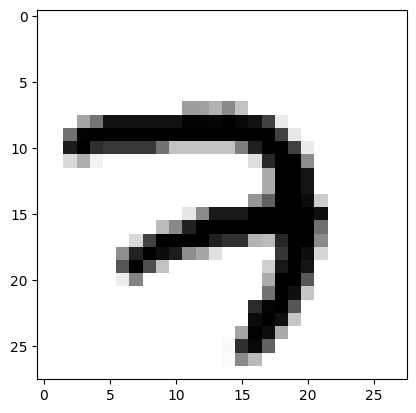

In [32]:
#plot the img
plt.imshow(X_train[0],cmap="binary")

<Axes: >

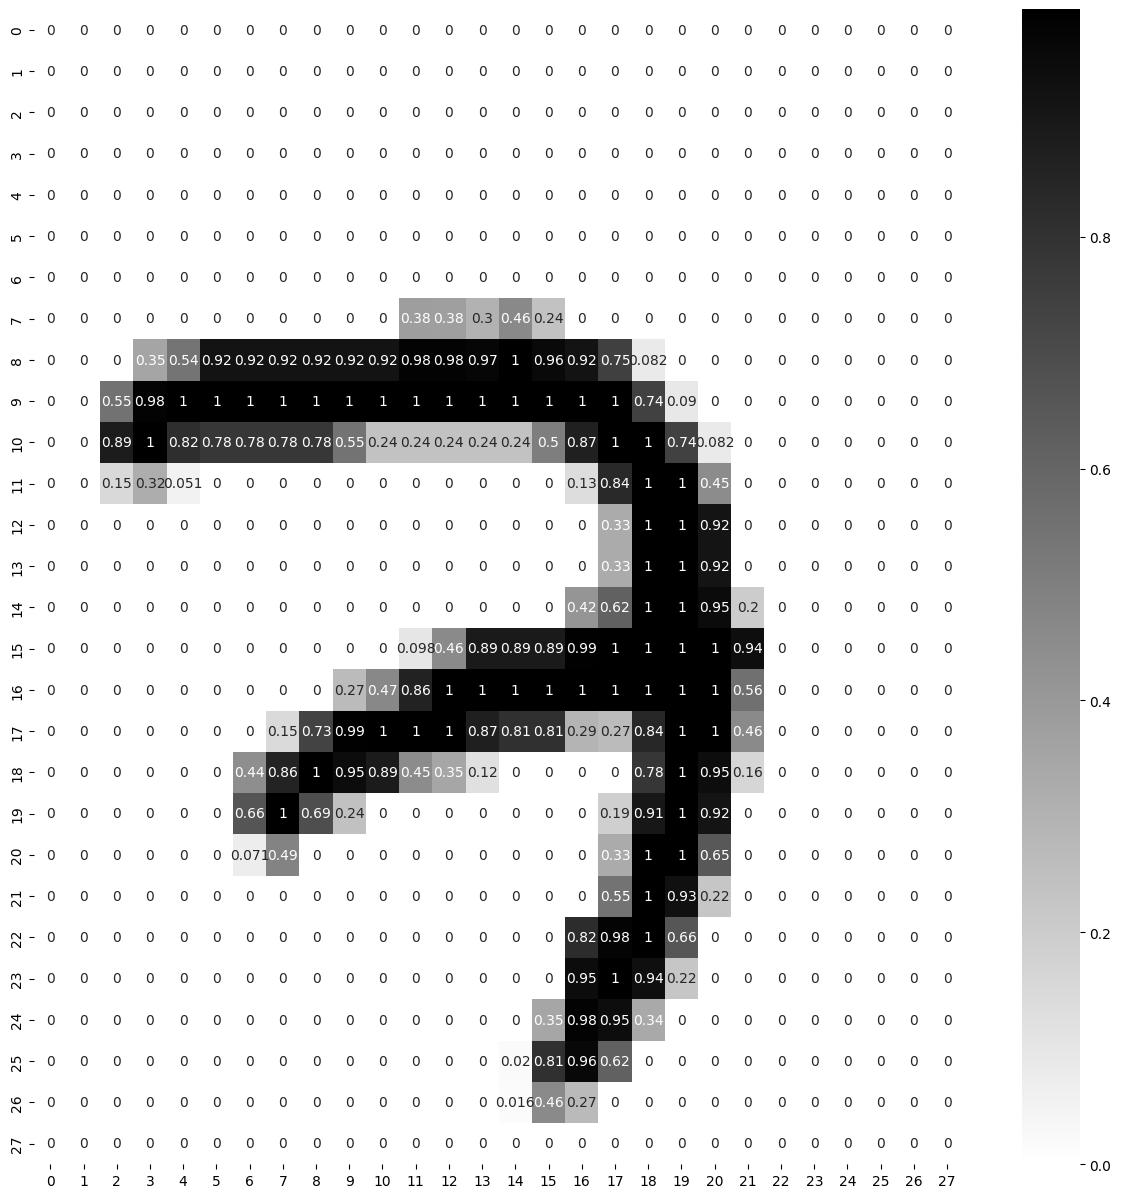

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

In [34]:
#define layers and build the model
layers=[
    tf.keras.layers.Flatten(name="inputLayer",input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
    tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"),
]

model=tf.keras.models.Sequential(layers)

In [35]:
#compile model with optimizer,loss_fn nad metric
model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Q3)Train the neural network on the chosen dataset without using batch normalization

In [37]:
#fit model without batch normalization
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),batch_size=32,verbose=2)

Epoch 1/10
1719/1719 - 5s - loss: 0.6235 - accuracy: 0.8373 - val_loss: 0.3081 - val_accuracy: 0.9136 - 5s/epoch - 3ms/step
Epoch 2/10
1719/1719 - 5s - loss: 0.2928 - accuracy: 0.9175 - val_loss: 0.2422 - val_accuracy: 0.9318 - 5s/epoch - 3ms/step
Epoch 3/10
1719/1719 - 7s - loss: 0.2392 - accuracy: 0.9325 - val_loss: 0.2061 - val_accuracy: 0.9434 - 7s/epoch - 4ms/step
Epoch 4/10
1719/1719 - 6s - loss: 0.2046 - accuracy: 0.9420 - val_loss: 0.1792 - val_accuracy: 0.9506 - 6s/epoch - 3ms/step
Epoch 5/10
1719/1719 - 5s - loss: 0.1786 - accuracy: 0.9499 - val_loss: 0.1652 - val_accuracy: 0.9550 - 5s/epoch - 3ms/step
Epoch 6/10
1719/1719 - 7s - loss: 0.1588 - accuracy: 0.9556 - val_loss: 0.1475 - val_accuracy: 0.9612 - 7s/epoch - 4ms/step
Epoch 7/10
1719/1719 - 6s - loss: 0.1422 - accuracy: 0.9598 - val_loss: 0.1395 - val_accuracy: 0.9616 - 6s/epoch - 3ms/step
Epoch 8/10
1719/1719 - 6s - loss: 0.1292 - accuracy: 0.9637 - val_loss: 0.1268 - val_accuracy: 0.9674 - 6s/epoch - 4ms/step
Epoch 9/

In [38]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.623518,0.837291,0.308066,0.9136
1,0.292818,0.917455,0.242170,0.9318
2,0.239208,0.932473,0.206125,0.9434
3,0.204623,0.941964,0.179156,0.9506
4,0.178617,0.949927,0.165193,0.9550
5,0.158767,0.955636,0.147456,0.9612
6,0.142197,0.959800,0.139463,0.9616
7,0.129229,0.963691,0.126775,0.9674
8,0.117313,0.967018,0.120802,0.9676
9,0.107755,0.969564,0.110973,0.9716


<Axes: >

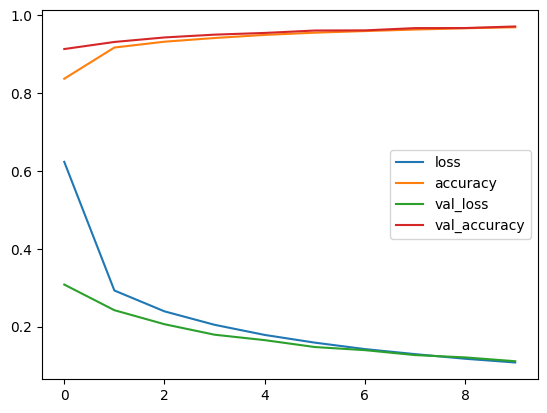

In [39]:
#plot accuracy
pd.DataFrame(history.history).plot()

Q4.Implement batch normalization layers in the neural network and train the model again

In [40]:
#make model with batch normalization
layers=[
    tf.keras.layers.Flatten(name="inputLayer",input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"),
]

model=tf.keras.models.Sequential(layers)

In [41]:
#compile model with optimizer,loss_fn nad metric
model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [42]:
#fit model with batch normalization
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),batch_size=32,verbose=2)

Epoch 1/10
1719/1719 - 8s - loss: 0.3307 - accuracy: 0.9036 - val_loss: 0.1488 - val_accuracy: 0.9586 - 8s/epoch - 5ms/step
Epoch 2/10
1719/1719 - 6s - loss: 0.1614 - accuracy: 0.9529 - val_loss: 0.1137 - val_accuracy: 0.9678 - 6s/epoch - 4ms/step
Epoch 3/10
1719/1719 - 6s - loss: 0.1203 - accuracy: 0.9651 - val_loss: 0.0983 - val_accuracy: 0.9722 - 6s/epoch - 3ms/step
Epoch 4/10
1719/1719 - 9s - loss: 0.0942 - accuracy: 0.9727 - val_loss: 0.0888 - val_accuracy: 0.9740 - 9s/epoch - 5ms/step
Epoch 5/10
1719/1719 - 8s - loss: 0.0777 - accuracy: 0.9774 - val_loss: 0.0841 - val_accuracy: 0.9764 - 8s/epoch - 5ms/step
Epoch 6/10
1719/1719 - 7s - loss: 0.0638 - accuracy: 0.9814 - val_loss: 0.0797 - val_accuracy: 0.9774 - 7s/epoch - 4ms/step
Epoch 7/10
1719/1719 - 8s - loss: 0.0555 - accuracy: 0.9838 - val_loss: 0.0777 - val_accuracy: 0.9798 - 8s/epoch - 5ms/step
Epoch 8/10
1719/1719 - 7s - loss: 0.0472 - accuracy: 0.9867 - val_loss: 0.0735 - val_accuracy: 0.9784 - 7s/epoch - 4ms/step
Epoch 9/

In [43]:
#make table
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.330652,0.903582,0.148773,0.9586
1,0.161376,0.952891,0.113706,0.9678
2,0.120314,0.965109,0.098320,0.9722
3,0.094219,0.972745,0.088827,0.9740
4,0.077664,0.977382,0.084077,0.9764
5,0.063782,0.981400,0.079705,0.9774
6,0.055548,0.983836,0.077739,0.9798
7,0.047235,0.986745,0.073462,0.9784
8,0.040294,0.988727,0.073307,0.9786
9,0.035938,0.990509,0.074745,0.9780


Q5)Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization?


Model gives accuracy without Batch Normalization:-96.70%
Model gives accuracy with Batch Normalization:-99.05%

<Axes: >

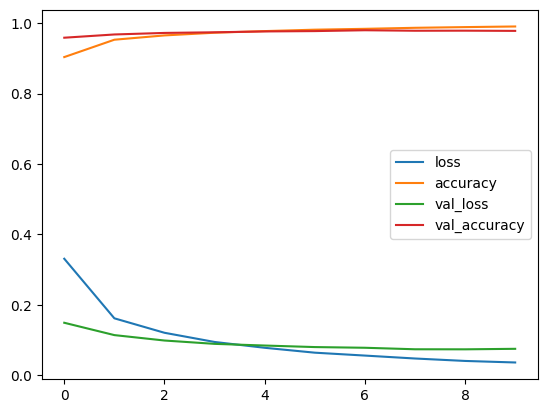

In [44]:
#plot accuracy
pd.DataFrame(history.history).plot()

Q6)Discuss the impact of batch normalization on the training process and the performance of the neural network.

Improved Convergence Speed:

Batch Normalization normalizes the inputs of each layer to have zero mean and unit variance. This helps in stabilizing the learning process and reduces the vanishing/exploding gradient problems.
The normalization of inputs across mini-batches allows for smoother and faster convergence during training. Neural networks with Batch Normalization tend to require fewer epochs to achieve similar or better performance compared to networks without it.

Increased Learning Rates:

Batch Normalization allows for the use of higher learning rates without the risk of divergence. The normalization process mitigates the impact of large weight updates, enabling more aggressive optimization.

Reduced Sensitivity to Initialization:

Neural networks are sensitive to weight initialization. Batch Normalization reduces this sensitivity by normalizing inputs, making the network less dependent on the choice of initial weights.

Regularization Effect:

Batch Normalization has an intrinsic regularization effect, acting as a form of noise during training. This can help prevent overfitting to the training data, leading to improved generalization to unseen data.

Addressing Internal Covariate Shift:

Internal covariate shift occurs when the distribution of the inputs to a layer changes during training, making it harder for the network to learn. Batch Normalization mitigates this by normalizing the inputs, maintaining a more stable distribution throughout training.

Facilitates Deeper Networks:

Batch Normalization allows for the training of deeper neural networks. It helps in mitigating issues related to vanishing or exploding gradients, which are common challenges in deep networks.

Q3. Experimentation and Analysis.


Q1.Experiment with different batch sizes and observe the effect on the training dynamics and model performance

In [45]:
#fit model with different batch size
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),batch_size=10,verbose=2)

Epoch 1/10
5500/5500 - 20s - loss: 0.1810 - accuracy: 0.9425 - val_loss: 0.1008 - val_accuracy: 0.9714 - 20s/epoch - 4ms/step
Epoch 2/10
5500/5500 - 20s - loss: 0.1504 - accuracy: 0.9529 - val_loss: 0.0847 - val_accuracy: 0.9764 - 20s/epoch - 4ms/step
Epoch 3/10
5500/5500 - 25s - loss: 0.1297 - accuracy: 0.9592 - val_loss: 0.0901 - val_accuracy: 0.9756 - 25s/epoch - 5ms/step
Epoch 4/10
5500/5500 - 21s - loss: 0.1128 - accuracy: 0.9648 - val_loss: 0.0767 - val_accuracy: 0.9794 - 21s/epoch - 4ms/step
Epoch 5/10
5500/5500 - 20s - loss: 0.1002 - accuracy: 0.9684 - val_loss: 0.0843 - val_accuracy: 0.9768 - 20s/epoch - 4ms/step
Epoch 6/10
5500/5500 - 20s - loss: 0.0941 - accuracy: 0.9699 - val_loss: 0.0807 - val_accuracy: 0.9788 - 20s/epoch - 4ms/step
Epoch 7/10
5500/5500 - 20s - loss: 0.0882 - accuracy: 0.9727 - val_loss: 0.0779 - val_accuracy: 0.9784 - 20s/epoch - 4ms/step
Epoch 8/10
5500/5500 - 20s - loss: 0.0845 - accuracy: 0.9733 - val_loss: 0.0780 - val_accuracy: 0.9780 - 20s/epoch - 4

When you fit model with different batch_size the model accuracy will change based on batch_size.batch_size can act as a hyper paramter for defining neural
network model.

Q2)Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

**Advantages of Batch Normalization:**

1. **Stabilized Learning:**
   - Batch Normalization helps stabilize and accelerate the training process by normalizing the inputs, mitigating issues like vanishing or exploding gradients.

2. **Faster Convergence:**
   - Neural networks with Batch Normalization often converge faster, requiring fewer training epochs to reach similar or better performance compared to networks without it.

3. **Higher Learning Rates:**
   - Batch Normalization enables the use of higher learning rates without the risk of divergence. This can speed up the optimization process and lead to better generalization.

4. **Reduced Sensitivity to Initialization:**
   - The technique reduces sensitivity to weight initialization, making it less critical to choose optimal initial weights.

5. **Regularization Effect:**
   - Batch Normalization acts as a form of regularization by adding noise to the training process, helping prevent overfitting and improving the generalization of the model.

6. **Mitigation of Internal Covariate Shift:**
   - By normalizing the inputs of each layer, Batch Normalization mitigates the effects of internal covariate shift, improving the overall stability of the training process.

7. **Compatibility with Various Architectures:**
   - Batch Normalization is applicable to different types of neural network architectures, including feedforward networks, convolutional neural networks (CNNs), and recurrent neural networks (RNNs).

8. **Facilitation of Deeper Networks:**
   - Batch Normalization allows for the training of deeper neural networks by addressing challenges associated with deep architectures, such as vanishing gradients.

9. **Robustness to Hyperparameter Choices:**
   - Batch Normalization makes neural networks less sensitive to the choice of hyperparameters like learning rate and weight initialization, making it easier to train models with good performance.

**Potential Limitations and Considerations:**

1. **Computational Overhead:**
   - Batch Normalization introduces additional computational overhead during training, as it requires calculating mean and standard deviation statistics for each mini-batch.

2. **Batch Size Sensitivity:**
   - The effectiveness of Batch Normalization can be sensitive to the choice of batch size. Small batch sizes may lead to inaccurate statistics estimation, affecting the normalization process.

3. **Incompatibility with Certain Architectures:**
   - While Batch Normalization is effective in many scenarios, it may not be as beneficial for certain architectures, such as some types of recurrent neural networks (RNNs), and can even hinder performance in specific cases.

4. **Test-time Variability:**
   - During inference (test time), the mean and standard deviation of the entire dataset may differ from those of individual mini-batches used during training. Techniques like running averages are often employed to address this, but they may not capture the exact statistics of the test data distribution.

5. **Dependency on Batch Order:**
   - The order of data in a mini-batch can affect the training process. Shuffling the data can introduce variability, potentially impacting the effectiveness of Batch Normalization.

6. **Not Always Necessary for Shallower Networks:**
   - For small or shallow networks, the benefits of Batch Normalization may be limited, and the computational cost may outweigh the advantages.

7. **Alternatives and Generalization:**
   - While Batch Normalization is widely used, alternative normalization techniques like Layer Normalization and Group Normalization have been proposed, and their effectiveness can depend on the specific characteristics of the data and the network.

In summary, Batch Normalization is a powerful technique that has demonstrated significant benefits in the training of neural networks, especially in deep architectures. However, practitioners should be aware of its potential limitations and consider alternative normalization methods based on the specific requirements of their models and datasets.